## Task 1: Advanced Objective Function and Use Case

### 1. Log Reg Objective Function Derivation

In [1]:
%%latex
\begin{align}
    \text{Using MLE we start with a Bernoulli Distribution} \newline
    P(y = 1 | x, \theta) = h_\theta(x) \newline
    P(y = 0 | x, \theta) = 1 - h_\theta(x) \newline

    \newline


    \text{This brings us to the Probability Mass Function} \newline
    P(y | x, \theta) = (h_\theta(x))^y (1 - h_\theta(x))^{1-y} \newline

    \newline

    \text{The Likelihood Function is then} \newline
    L(\theta) = \prod_{i = 1}^{m} P(y^{(i)} | x^{(i)}, \theta) = \prod_{i = 1}^{m} (h_\theta(x^{(i)}))^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{1-y^{(i)}} \newline


    \newline
    \text{The Log-Likelihood Function is} \newline
    l(\theta) = log L(\theta) = \sum_{i = 1}^{m} [y^{(i)} log(h_\theta(x^{(i)})) + (1-y^{(i)}) log(1-h_\theta(x^{(i)}))] \newline
    

    \newline
    \text{Now we minimize the cost using the objective function} \newline
    J(\theta) = -\frac{1}{m} l(\theta) \newline
    J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [(y^{(i)}) log(h_\theta(x^{(i)})) + (1-y^{(i)}) log(1-h_\theta(x^{(i)}))]

\end{align}


<IPython.core.display.Latex object>

### MAP vs MLE
- both are estimation methods used to find the weights of a model given some data
- MLE maximizes the likelihoods of observing the given data while MAP maximizes the posterior probability which is derived through Bayes Rule
- MLE is basically MAP but with equal priors
- As more data is shown during training, the priors go away and MAP converges to the MLE estimate 
- MLE is useful for large datasets where noise is minized due to large numbers and it does not have to think twice about the data it's seeing
- MAP is better used for smaller datasets with lots of noise as it uses priors (some prexisting knowledge) which it can stand by

https://www.geeksforgeeks.org/data-science/mle-vs-map/

### 2. Defining Machine Learning Problem
- A problem which I would like to sovle using logistic regression would leverage a binary output, so some for of classification. Credit card fraud detection could be a cool problem to solve with logisic regression as it is a classification problem. Given a few transactions we should be able to identify each as either fraud or not fraud. We could compare this to a linear SVM will form a differnt type of classification as it will try to maximize the margin between the two classed (fraud, not fraud) while logisitc regression will try to maximize the likelihood of the data. The SVM might perform better as it will not be as affected as outliers as much as Logistic Regression will. Logisitic Regression is a good starting point as we will be able to explain what features led to the classification while SVMs act more as a black box. 

### 3. Discuss how dataset corresponds to equation vars
- Theta -> model weights which we will derive after training
- x^(i) -> input features which come from the dataset features
- y^(i) -> target labels which come from the dataset class (fraud, not fraud) 
- h_theta(x^(i)) -> model prediction

## Task 2: Dataset and Advanced EDA

In [2]:
# Using Python 3 (ipykernel) on Google Collab GPU T4 normal memory

import numpy as np
import pandas as pd
import kagglehub

# Data at https://www.kaggle.com/datasets/mlg-ulb/creditcardataraud/data
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

Using Colab cache for faster access to the 'creditcardfraud' dataset.


In [3]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')


In [4]:
data.head()
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.isnull().sum().max()

0

In [6]:
print('No Frauds', round(data['Class'].value_counts()[0] / len(data) * 100, 2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1] / len(data) * 100, 2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

   feature        VIF
0     Time   2.339858
1       V1   1.638237
2       V2   3.900804
3       V3   1.321018
4       V4   1.172479
5       V5   2.764441
6       V6   1.528629
7       V7   2.603517
8       V8   1.098591
9       V9   1.037715
10     V10   1.208870
11     V11   1.080378
12     V12   1.154440
13     V13   1.003473
14     V14   1.219562
15     V15   1.014148
16     V16   1.080994
17     V17   1.227258
18     V18   1.033900
19     V19   1.040800
20     V20   2.233935
21     V21   1.103107
22     V22   1.082408
23     V23   1.149293
24     V24   1.000773
25     V25   1.013526
26     V26   1.000539
27     V27   1.009509
28     V28   1.001595
29  Amount  11.507919
30   Class   2.093512


In [9]:
# scaling amount coloumn to make vars less corrolated | Amount = 11.50 !!

from sklearn.preprocessing import StandardScaler
# handling highly corrolated features: Amount
# plan to log transform and standardize Amount feature
data['Log_Amount'] = np.log1p(data['Amount'])
scaler = StandardScaler()
data['Scaled_Amount'] = scaler.fit_transform(data['Log_Amount'].values.reshape(-1,1))
data = data.drop(['Amount','Log_Amount'], axis=1)

In [10]:
vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

          feature       VIF
0            Time  1.106911
1              V1  1.040504
2              V2  1.351141
3              V3  1.112784
4              V4  1.040738
5              V5  1.160758
6              V6  1.048742
7              V7  1.091265
8              V8  1.001895
9              V9  1.030500
10            V10  1.099072
11            V11  1.070684
12            V12  1.148196
13            V13  1.000998
14            V14  1.192098
15            V15  1.014758
16            V16  1.096929
17            V17  1.222535
18            V18  1.031613
19            V19  1.003066
20            V20  1.035846
21            V21  1.015426
22            V22  1.007926
23            V23  1.002063
24            V24  1.000553
25            V25  1.012164
26            V26  1.000812
27            V27  1.003887
28            V28  1.000222
29          Class  2.092041
30  Scaled_Amount  1.643626


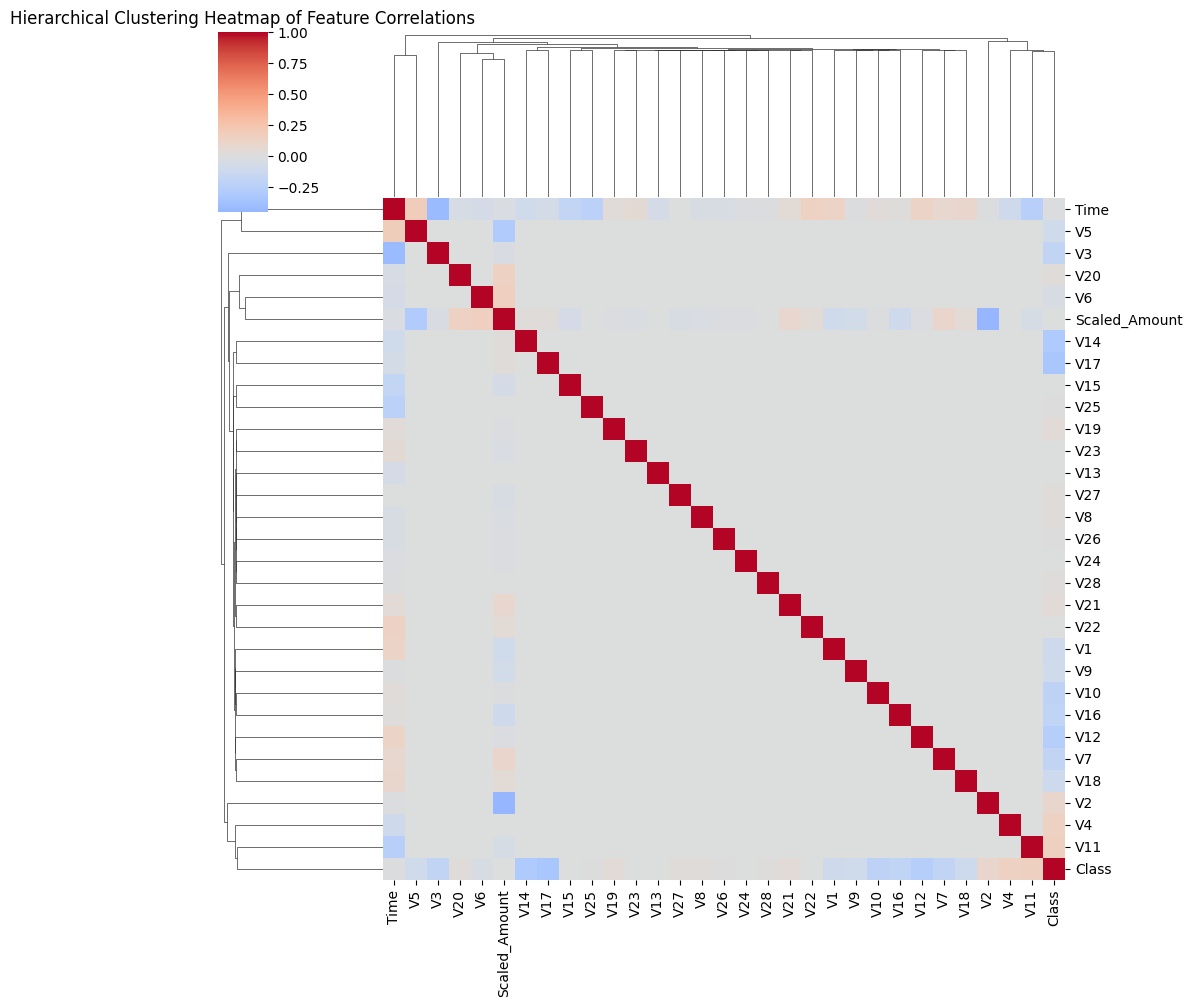

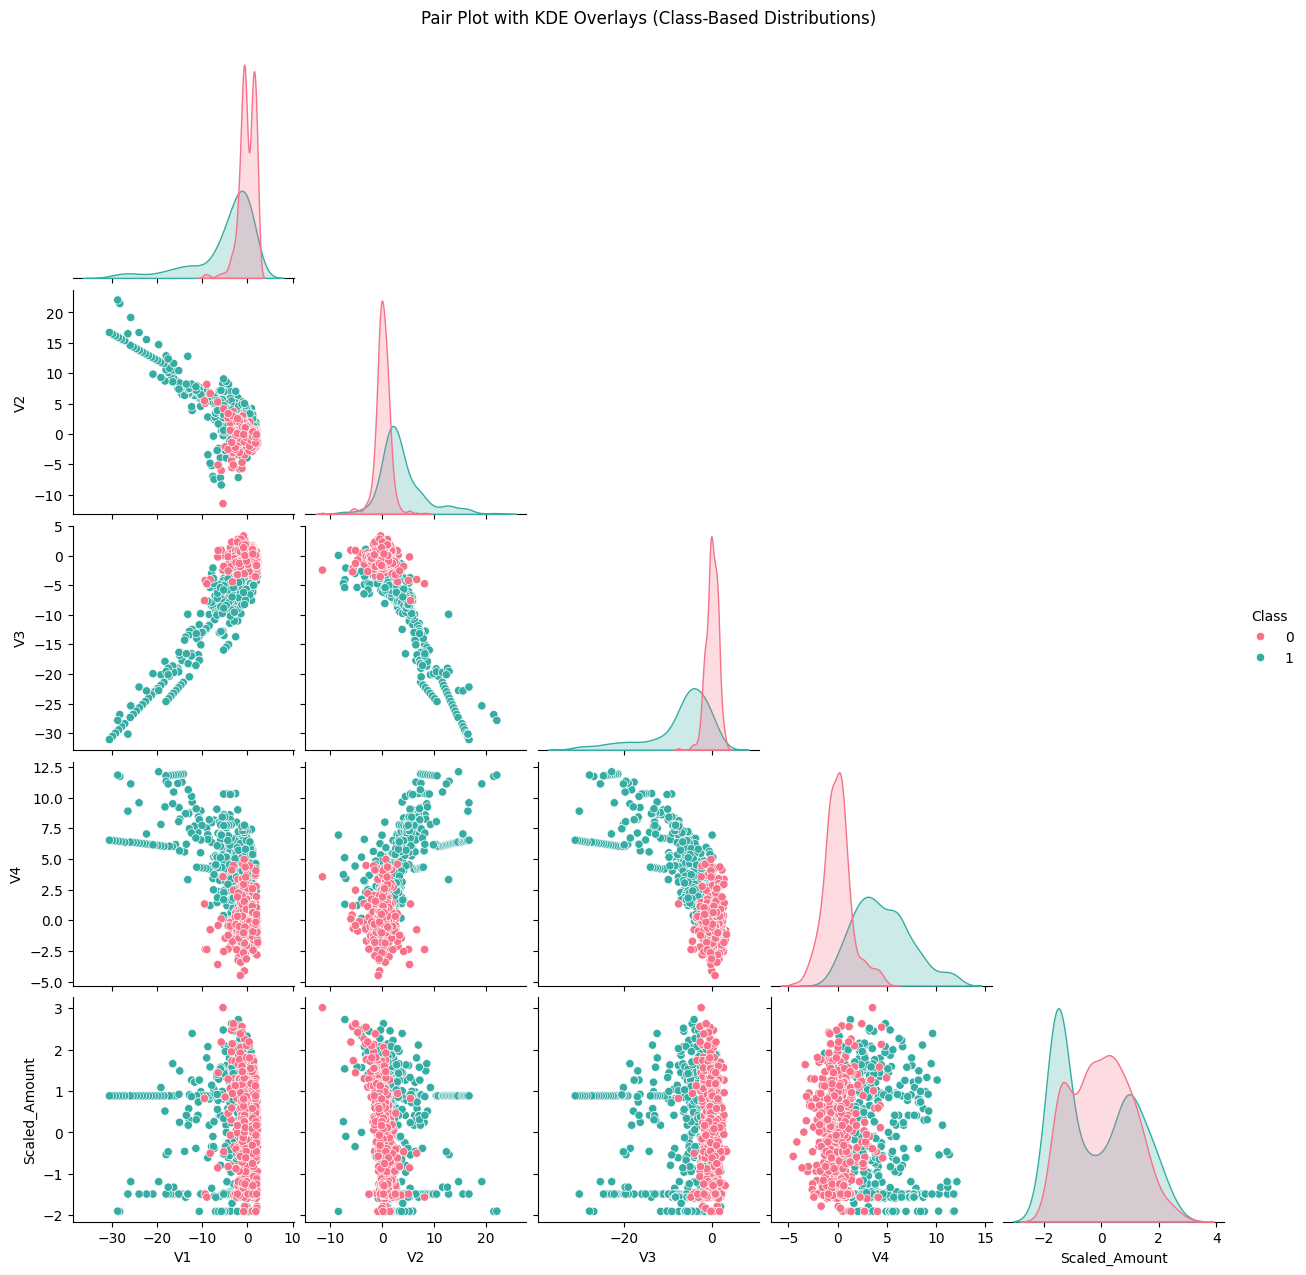

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clustermap
corr_matrix = data.corr()
sns.clustermap(corr_matrix, 
               cmap='coolwarm', 
               center=0, 
               annot=False, 
               figsize=(10, 10))
plt.title('Hierarchical Clustering Heatmap of Feature Correlations')
plt.savefig('clustermap.png')

# KDE
# subsampling
subset_features = ['V1', 'V2', 'V3', 'V4', 'Scaled_Amount', 'Class']
fraud_indices = data[data.Class == 1].index
genuine_indices = data[data.Class == 0].sample(len(fraud_indices)).index
sampled_data = data.loc[fraud_indices.append(genuine_indices)]

sns.pairplot(sampled_data[subset_features], 
             hue='Class', 
             diag_kind='kde', 
             palette='husl', 
             corner=True)
plt.suptitle('Pair Plot with KDE Overlays (Class-Based Distributions)', y=1.02)
plt.savefig('pairplot_kde.png')

## Task 3: Logistic Regression Implementation

In [12]:
from scipy.special import softmax
import time

def stochastic_grad_desc(W, X, Y_onehot, lr, max_iters, e, class_weights):
    n_samples = X.shape[0]
    loss_history = []
    start_time = time.time()

    w_scale = np.array(list(class_weights.values())).reshape(-1, 1)

    # Record initial loss
    initial_loss = compute_loss(W, X, Y_onehot)
    loss_history.append(initial_loss)
    print(f'Initial Loss: {initial_loss}')

    for t in range(max_iters):
        W_prev = W.copy()
        for i in np.random.permutation(n_samples):
            xi = X[i]       
            yi = Y_onehot[i] 

            probs = softmax(W @ xi) 

            # error
            error = (probs - yi) 

            # update weights
            W -= lr * (w_scale * np.outer(error, xi))

        current_loss = compute_loss(W, X, Y_onehot)
        loss_history.append(current_loss)
        if t % 1 == 0:
             print(f'Epoch {t}: Loss {current_loss}')

        if np.linalg.norm(W - W_prev) <= e:
            print(f'Converged at epoch {t}')
            break
            
    total_time = time.time() - start_time
    return W, loss_history, total_time

def mini_batch_grad_desc(W, X, Y_onehot, lr, max_iters, e, class_weights, batch_size=64):
    n_samples = X.shape[0]
    loss_history = []
    start_time = time.time()
    w_scale = np.array(list(class_weights.values())).reshape(-1, 1)

    # Record initial loss
    initial_loss = compute_loss(W, X, Y_onehot)
    loss_history.append(initial_loss)
    print(f'Initial Loss: {initial_loss}')

    for t in range(max_iters):
        W_prev = W.copy()
    
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        Y_shuffled = Y_onehot[indices]
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size] 
            Y_batch = Y_shuffled[i:i + batch_size] 

            # forward pass
            scores = X_batch @ W.T
            probs = softmax(scores, axis=1)

            # compute gradient
            grad = (probs - Y_batch).T @ X_batch
            
            # dividing by batch size
            W -= (lr / batch_size) * (w_scale * grad)

        current_loss = compute_loss(W, X, Y_onehot)
        loss_history.append(current_loss)
        if t % 1 == 0:
             print(f'Epoch {t}: Loss {current_loss}')

        # convergence check
        if np.linalg.norm(W - W_prev) <= e:
            print(f'Converged at epoch {t}')
            break
            
    total_time = time.time() - start_time
    return W, loss_history, total_time

def batch_grad_desc(W, X, Y_onehot, lr, max_iters, e, class_weights):
    n_samples = X.shape[0]
    loss_history = []
    start_time = time.time()
    w_scale = np.array(list(class_weights.values())).reshape(-1, 1)

    # Record initial loss
    initial_loss = compute_loss(W, X, Y_onehot)
    loss_history.append(initial_loss)
    print(f'Initial Loss: {initial_loss}')

    for t in range(max_iters):
        W_prev = W.copy()

        # forward pass
        scores = X @ W.T
        probs = softmax(scores, axis=1)

        # global gradient
        grad = (probs - Y_onehot).T @ X
        
        # average gradient using our scaled weights
        W -= (lr / n_samples) * (w_scale * grad)

        current_loss = compute_loss(W, X, Y_onehot)
        loss_history.append(current_loss)
        if t % 1 == 0:
             print(f'Epoch {t}: Loss {current_loss}')

        # convergence check 
        if np.linalg.norm(W - W_prev) <= e:
            print(f"Converged at epoch {t}")
            break
            
    total_time = time.time() - start_time
    return W, loss_history, total_time

def compute_loss(W, X, Y_onehot):
    n = X.shape[0]
    probs = softmax(X @ W.T, axis=1)
    loss = -np.sum(Y_onehot * np.log(probs + 1e-9)) / n
    return loss

In [13]:
# This is not optimzied for gpu as I had already written most of it for a different class

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

def log_reg(X, Y, n=0.01, e=1e-5, max_iters=100, lr = 0.01, gradient_method='sgd', W_init=None):
    # data split
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2
    )

    n, d = X_train.shape
    K = 2

    # map to Rd+1
    X_hat = np.c_[np.ones(n), X_train]

    # k dim bernoulli vetor
    Y_onehot = np.eye(K)[Y_train]

    # init weight vector
    if W_init is None:
        W = np.random.randn(K, d + 1)
    else:
        W = W_init.copy()

    # optimizing for the class imbalance
    weights = {0: 1.0, 1: 50.0}
    
    loss_history = []
    exec_time = 0

    if gradient_method == 'mini-batch':
        W, loss_history, exec_time = mini_batch_grad_desc(W, X_hat, Y_onehot, lr, max_iters, e, weights, batch_size=64)
    elif gradient_method == 'sgd':  
        W, loss_history, exec_time = stochastic_grad_desc(W, X_hat, Y_onehot, lr, max_iters, e, weights)
    elif gradient_method == 'batch':
        W, loss_history, exec_time = batch_grad_desc(W, X_hat, Y_onehot, lr, max_iters, e, weights)

    print("W:")
    print(W)

    # evaluation on test data
    X_test_hat = np.c_[np.ones(X_test.shape[0]), X_test]
    scores_test = X_test_hat @ W.T
    probs_test  = softmax(scores_test, axis=1)
    y_pred      = np.argmax(probs_test, axis=1)

    acc = accuracy_score(Y_test, y_pred)
    f1  = f1_score(Y_test, y_pred, average='macro')

    print("Test size:", len(Y_test))
    print("Accuracy on test data:", acc)
    print("F1 score on test data:", f1)
    print("Execution time:", exec_time)

    return W, acc, f1, loss_history, exec_time


In [14]:
# setting up data
X_data = data.drop(columns=['Class', 'Time']) 
Y_data = data['Class']

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_data)


Running batch gradient descent...
Initial Loss: 3.338129754095917
Epoch 0: Loss 1.3716693902506996
Epoch 1: Loss 0.5154298593348922
Epoch 2: Loss 0.25015762882067033
Epoch 3: Loss 0.1520823043879768
Epoch 4: Loss 0.10094061172934568
Epoch 5: Loss 0.06946292874493575
Epoch 6: Loss 0.049165108359798516
Epoch 7: Loss 0.035904700375650626
Epoch 8: Loss 0.02747253057958803
Epoch 9: Loss 0.022294456730773165
Epoch 10: Loss 0.01902500630950789
Epoch 11: Loss 0.01685383056866497
Epoch 12: Loss 0.015349376220862472
Epoch 13: Loss 0.01425646637088319
Epoch 14: Loss 0.013418376392688787
Epoch 15: Loss 0.012752980152164412
Epoch 16: Loss 0.012205019118340928
Epoch 17: Loss 0.011739127764812087
Epoch 18: Loss 0.01133409702283267
Epoch 19: Loss 0.010976456712023264
Epoch 20: Loss 0.010657137936172024
Epoch 21: Loss 0.010369678464542939
Epoch 22: Loss 0.010109250309959775
Epoch 23: Loss 0.009872294405501423
Epoch 24: Loss 0.009656177315325424
Epoch 25: Loss 0.009458443609008422
Epoch 26: Loss 0.0092

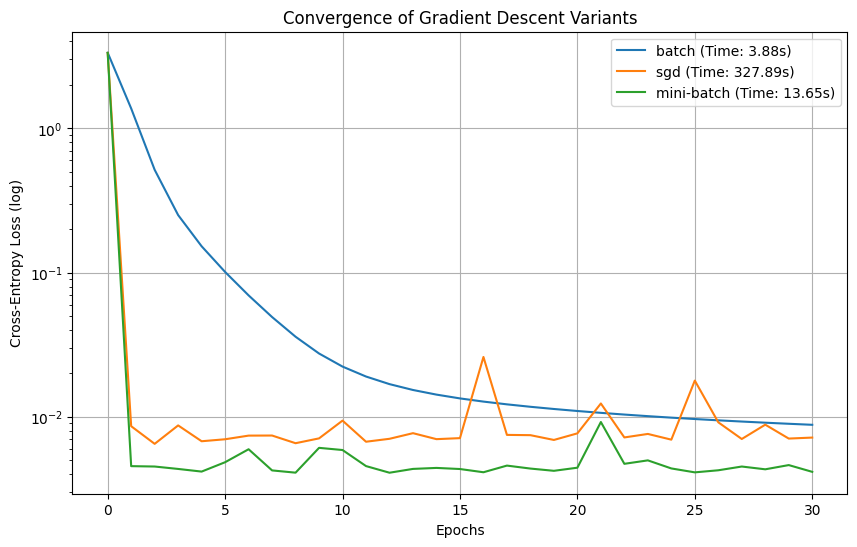

In [15]:
import matplotlib.pyplot as plt

# Run experiments
methods = ['batch', 'sgd', 'mini-batch']
rates = [0.1, 0.001, 0.01]
results = {}

# Initialize shared weights
n_features = X_scaled.shape[1]
K = 2
W_init = np.random.randn(K, n_features + 1)

for method, rate in zip(methods, rates):
    print(f"\nRunning {method} gradient descent...")
    W, acc, f1, loss_hist, t_exec = log_reg(X_scaled, Y_data.values, max_iters=30, lr = rate, gradient_method=method, W_init=W_init)
    results[method] = {'loss': loss_hist, 'time': t_exec, 'acc': acc, 'f1': f1}

# Plotting Loss Convergence
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(results[method]['loss'], label=f"{method} (Time: {results[method]['time']:.2f}s)")

plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss (log)')
plt.title('Convergence of Gradient Descent Variants')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

### Convergence Behavior
- SGD: converges but not smoothly, has a jittery property throughout the training session. It updates the weights after every single sample with noisy gradients. This can push weights in suboptimal directions and lead to a bouncy curve. It's also slower to converge due to the expensive python looping operations. 
- Batch: smooth curve throughout due to the entire dataset being used to calculate the loss (outliers are minimized). The entire dataset is used to calculate the single gradient so each iteration is directly towrad convergence.
- Mini-batch: smoother than sgd but noisier than batch. This makes sense as it is used a subset of the data to calculate the gradient. It is slightly affected by outliers if there is one present in the current batch which causes the noise. 

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# optimize for gpu as we are dealing with a longer training session (testing many learning rates)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def log_reg_torch(X, Y, lr=0.01, max_iters=100, optimizer_name='adam', batch_size=64):
    start_time = time.perf_counter()
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train_t = torch.tensor(Y_train, dtype=torch.long).to(device)
    X_test_t = torch.tensor(X_test, dtype=torch.float32).to(device)

    model = nn.Linear(X_train.shape[1], 2).to(device)
    weights = torch.tensor([1.0, 50.0], dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)

    # optimizers from package
    if optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=lr)
    elif optimizer_name == 'momentum':
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    else:
        optimizer = optim.SGD(model.parameters(), lr=lr)

    # main training loop
    loss_history = []
    for epoch in range(max_iters):
        permutation = torch.randperm(X_train_t.size()[0])
        epoch_loss = 0
        for i in range(0, X_train_t.size()[0], batch_size):
            indices = permutation[i:i + batch_size]
            batch_x, batch_y = X_train_t[indices], Y_train_t[indices]
            optimizer.zero_grad(set_to_none=True)
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        loss_history.append(epoch_loss / (X_train_t.size(0)/batch_size))

    exec_time = time.perf_counter() - start_time

    with torch.no_grad():
        test_outputs = model(X_test_t)
        y_pred = torch.argmax(test_outputs, dim=1).cpu().numpy()
    
    acc = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred, average='macro')

    return model.state_dict(), acc, f1, loss_history, exec_time

Optimizer  | LR      | BS    | F1      | Time   
----------
sgd        | 0.1     | 256   | 0.8771  | 22.06  s
sgd        | 0.1     | 512   | 0.8261  | 11.16  s
sgd        | 0.01    | 256   | 0.8218  | 21.79  s
sgd        | 0.01    | 512   | 0.8543  | 11.20  s
sgd        | 0.001   | 256   | 0.8712  | 21.84  s
sgd        | 0.001   | 512   | 0.8634  | 10.98  s
momentum   | 0.1     | 256   | 0.6793  | 23.18  s
momentum   | 0.1     | 512   | 0.6440  | 11.62  s
momentum   | 0.01    | 256   | 0.8457  | 22.83  s
momentum   | 0.01    | 512   | 0.8370  | 11.66  s
momentum   | 0.001   | 256   | 0.8141  | 22.96  s
momentum   | 0.001   | 512   | 0.8515  | 11.54  s
rmsprop    | 0.1     | 256   | 0.6021  | 25.43  s
rmsprop    | 0.1     | 512   | 0.7718  | 13.06  s
rmsprop    | 0.01    | 256   | 0.8344  | 26.07  s
rmsprop    | 0.01    | 512   | 0.7633  | 12.95  s
rmsprop    | 0.001   | 256   | 0.8372  | 26.89  s
rmsprop    | 0.001   | 512   | 0.8429  | 13.18  s
adam       | 0.1     | 256   | 0.6345  |

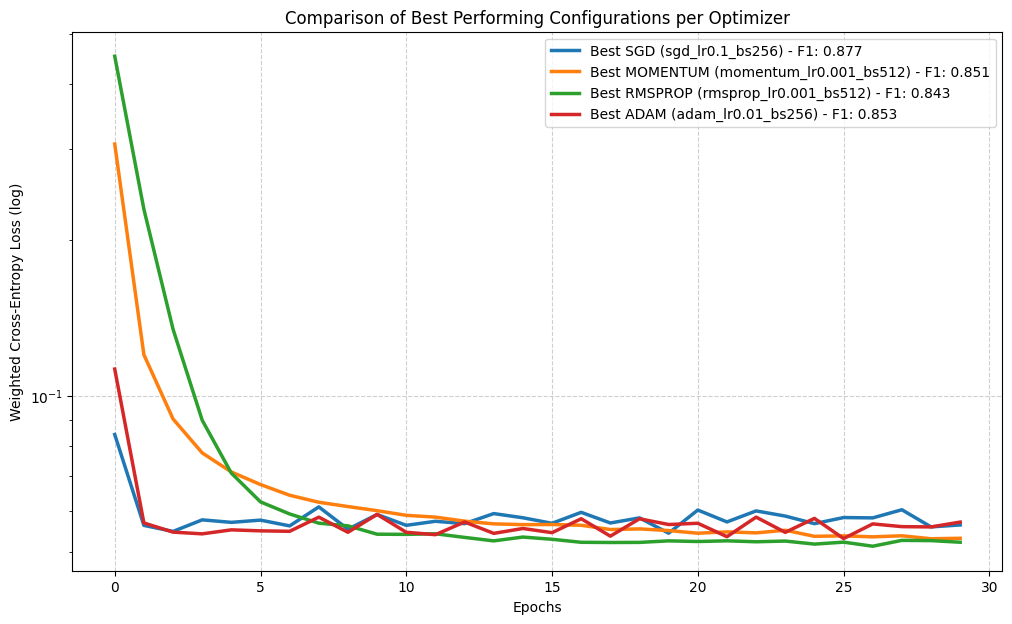

In [20]:
# hyperparameter loop
search_grid = {
    'optimizers': ['sgd', 'momentum', 'rmsprop', 'adam'],
    'learning_rates': [0.1, 0.01, 0.001],
    'batch_sizes': [256, 512] # higher as we are using gpu
}

results = {}
best_f1 = 0
best_cfg = None
epochs = 30

print(f"{'Optimizer':<10} | {'LR':<7} | {'BS':<5} | {'F1':<7} | {'Time':<7}")
print("----------")

for opt in search_grid['optimizers']:
    for lr in search_grid['learning_rates']:
        for bs in search_grid['batch_sizes']:
            
            _, acc, f1, loss_hist, t_exec = log_reg_torch(
                X_scaled, Y_data.values, 
                lr=lr, max_iters=epochs, 
                optimizer_name=opt, batch_size=bs
            )
            
            config_key = f"{opt}_lr{lr}_bs{bs}"
            results[config_key] = {'loss': loss_hist, 'acc': acc, 'f1': f1, 'time': t_exec}
            print(f"{opt:<10} | {lr:<7} | {bs:<5} | {f1:<7.4f} | {t_exec:<7.2f}s")
            
            if f1 > best_f1:
                best_f1, best_cfg = f1, config_key

plt.figure(figsize=(12, 7))

# best for each optimizer
best_by_optimizer = {}
for config_key, data in results.items():
    optimizer_name = config_key.split('_')[0]
    if optimizer_name not in best_by_optimizer or data['f1'] > best_by_optimizer[optimizer_name]['f1']:
        best_by_optimizer[optimizer_name] = {
            'config_key': config_key,
            'loss': data['loss'],
            'f1': data['f1']
        }

# plotting them
for opt_name, data in best_by_optimizer.items():
    plt.plot(data['loss'], label=f"Best {opt_name.upper()} ({data['config_key']}) - F1: {data['f1']:.3f}", linewidth=2.5)

plt.xlabel('Epochs')
plt.ylabel('Weighted Cross-Entropy Loss (log)')
plt.yscale('log')
plt.title('Comparison of Best Performing Configurations per Optimizer')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Effects of tuning
- larger batch size on the gpu proved to lead to faster runtimes for all the optimizers
- sgd has the best results with a larger learning rate which makes sense as it would help the model avoid getting caught in local minima.
- momentup also could get by with a smaller learning rate as the momentup multiplier helped it combat the trap issue which sgd has. 
- adam and rmsprop performed the best with lower learning rates which makes sense as they would already be accelerating the gradient based on the gradient history. they are less likely to get caught up and would want a more fine tuned approach. 
- momentup and rmsprop had the smoothest tail end curves as mommentup dampens noise using it's momentum abd rmsprop uses adaptive scaling to keep the noise in control

### Comparing to vanilla grad desc
- vanilla f1 = 0.9176864766676646 in 327.8869800567627s
- best optimized version: sgd with f1 = 0.8771 in 22.06s
- I was expecting a better job with the optimized version but it turns out that gpus are much better at speed rather than precision compared to cpu. this would explain the runtimes.


## Overview

### Computational complexity

- bgd: highest cost per update requires processing all n samples before a single weight change
- sgd/mini-batch: much lower per-update cost vectorizing into mini-batches (runtime 8.39s) is essential to eliminate the overhead of pure sgd (327s)
- adam and rmsprop: highest memory overhead as it has to store a running average of gradients for every parameter

### Interpretability

- momentum and sgd: super sensitive to learning rate so that must be managed. 
- adam/rmsprop: automatically handles differing learning rates and scales making them more interpretable for complex data and reducing grid search time

### Large Scale

- mini-batch sgd/momentum: balanced t4 gpu and produced good results and would work for large datasets. if we had smaller datasets stochastic or batch might be better as they eleminate more noise
- adam/rmsprop: best use for large datasets as they adaptively scales updates for infrequent features that would probably be ignored by sgd
- vanilla batch gd: would not work with large datasets as it requires the entire dataset to be stored and used to update the gradient, fine for small cases. 